# 🧩 Notebook 07: Model Diagnostics (Residuals, Q–Q, Heteroskedasticity)

In [1]:
# Setup and Imports

import pandas as pd
import matplotlib.pyplot as plt
import sys
from pathlib import Path

# ✅ Setup path to use utils
PROJECT_ROOT = Path.cwd().parent
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

# Project-level imports
from utils.diagnostics import (
    plot_residuals,
    plot_qq_residuals,
    plot_leverage_cooks,
    run_heteroskedasticity_tests
)
from utils.visual_utils import save_and_show_plot
from utils.model_utils import export_model_summary_as_text

import statsmodels.formula.api as smf

In [2]:
# Constants and Paths
DATA_PATH = Path("../synthetic_data")
EXPORT_PLOTS = Path("../exports/plots/07_model_diagnostics")
EXPORT_TABLES = Path("../exports/tables/07_model_diagnostics")

EXPORT_PLOTS.mkdir(parents=True, exist_ok=True)
EXPORT_TABLES.mkdir(parents=True, exist_ok=True)

In [3]:
# 🔹 Load dataset
df = pd.read_csv(DATA_PATH / "heteroskedastic_data.csv")
df.head()

,X,y
0,-1.250696,0.723282
1,0.021944,2.667977
2,-2.064957,-5.701790
3,-0.685998,1.481319
4,-0.927784,3.579077


## 🔹 Part 1: Fit Linear Model

In [4]:
# OLS model
model = smf.ols('y ~ X', data=df).fit()
print(model.summary())

# Export model summary
export_model_summary_as_text(model, EXPORT_TABLES / "ols_diagnostics_summary.txt")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     173.7
Date:                Sat, 26 Jul 2025   Prob (F-statistic):           6.82e-29
Time:                        23:39:22   Log-Likelihood:                -484.86
No. Observations:                 200   AIC:                             973.7
Df Residuals:                     198   BIC:                             980.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9218      0.194     15.034      0.0

## 🔹 Part 2: Residual Diagnostics

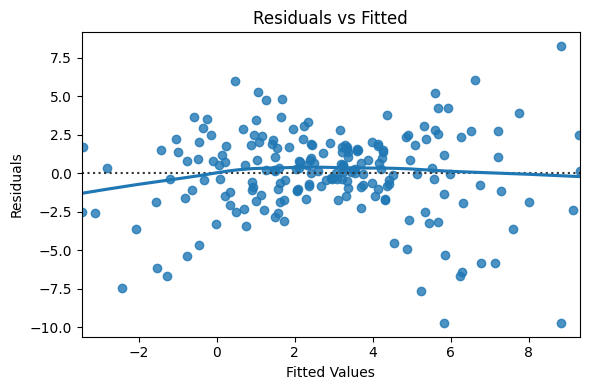

In [5]:
# Residuals vs Fitted Plot
plot_residuals(model, title="Residuals vs Fitted")
save_and_show_plot("residuals_vs_fitted", EXPORT_PLOTS)

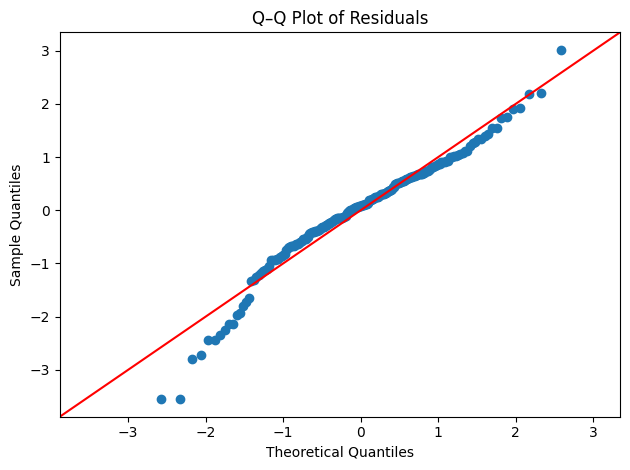

In [6]:
# Q–Q Plot
plot_qq_residuals(model, title="Q–Q Plot of Residuals")
save_and_show_plot("qqplot", EXPORT_PLOTS)

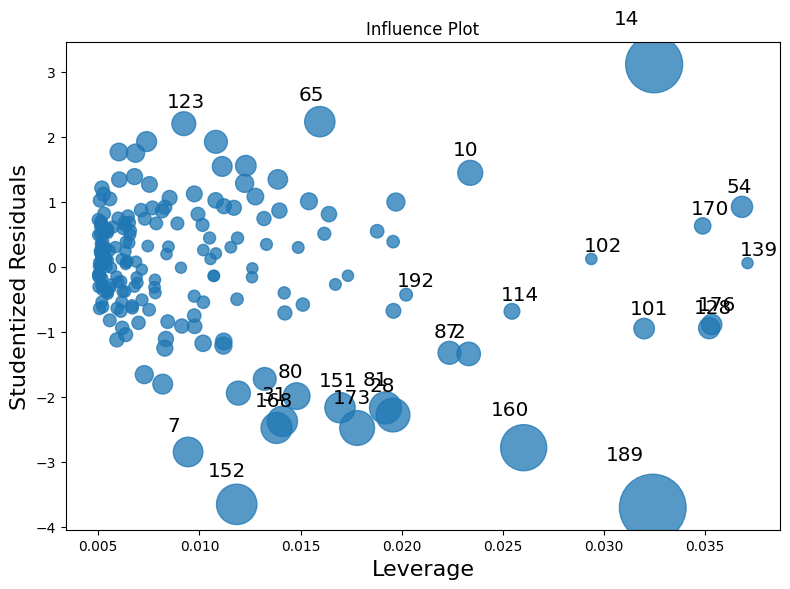

In [7]:
# Leverage + Cook’s Distance Plot
plot_leverage_cooks(model, title="Influence Plot")
save_and_show_plot("influence_plot", EXPORT_PLOTS)

## 🔹 Part 3: Heteroskedasticity Tests

In [8]:
# Run tests
test_results = run_heteroskedasticity_tests(model)
het_df = pd.DataFrame(test_results).T
display(het_df)

# Export
het_df.to_csv(EXPORT_TABLES / "heteroskedasticity_tests.csv")

,LM Stat,p-value,Stat
Breusch-Pagan,7.320302,6.817996e-03,NaN
White,NaN,1.073337e-07,32.094645


# ✅ Summary

- Fitted linear model on dataset with heteroskedasticity
- Conducted residual diagnostics:

    - 📈 Residuals vs Fitted plot
    - 📉 Q–Q plot for normality
    - 🔍 Influence & leverage plot

- Applied Breusch–Pagan and White’s test to detect heteroskedasticity
- Exported plots + summary tables for future reuse